### another library incoming

In [121]:
! pip install rdkit

In [122]:
import pandas as pd

### load bioactivity data (from 01.ipynb)

In [123]:
df = pd.read_csv('bioactivity_preprocessed_data.csv')

### calculate Lipinski descriptor

druglikeness: based on ADME
- absorption
- distribution
- metabolism
- excretion

Lipinski's rule: rule for druglikeness evaluation
- molecular weight < 500 Dalton
- Octanol-water partition coefficient (logP) < 5
- hydrogen bond donors < 5
- hydrogen bond acceptors < 10

In [124]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [125]:
# custom function to calculate Lipinski descriptors

def lipinski(smiles):

    mols = [Chem.MolFromSmiles(smile) for smile in smiles]

    desc_molWt = [Descriptors.MolWt(mol) for mol in mols]
    desc_logP = [Descriptors.MolLogP(mol) for mol in mols]
    desc_donors = [Lipinski.NumHDonors(mol) for mol in mols]
    desc_acceptors = [Lipinski.NumHAcceptors(mol) for mol in mols]   

    data = {
        'molecular_weight': desc_molWt,
        'logP': desc_logP,
        'numHDonors': desc_donors,
        'numHAcceptors': desc_acceptors 
    }
    return pd.DataFrame(data)

In [126]:
df_lipinski = lipinski(df.canonical_smiles)
df_lipinski

,molecular_weight,logP,numHDonors,numHAcceptors
0,281.271,1.89262,0,5
1,415.589,3.81320,0,2
2,421.190,2.66050,0,4
3,293.347,3.63080,0,3
4,338.344,3.53900,0,5
...,...,...,...,...
128,338.359,3.40102,0,5
129,296.366,3.44330,0,3
130,276.291,4.09564,0,3
131,278.307,3.29102,0,3


In [127]:
df

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,7200.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,9400.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,13500.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,13110.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,2000.0
...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,10600.0
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,10100.0
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,11500.0
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,10700.0


In [128]:
df_combined = pd.concat([df, df_lipinski], axis=1)
df_combined

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,molecular_weight,logP,numHDonors,numHAcceptors
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,7200.0,281.271,1.89262,0,5
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,9400.0,415.589,3.81320,0,2
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,13500.0,421.190,2.66050,0,4
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,13110.0,293.347,3.63080,0,3
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,2000.0,338.344,3.53900,0,5
...,...,...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,10600.0,338.359,3.40102,0,5
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,10100.0,296.366,3.44330,0,3
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,11500.0,276.291,4.09564,0,3
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,10700.0,278.307,3.29102,0,3


### convert IC50 to pIC50

IC50: standard values of drug potency  
pIC50: negative logarithmic scale of IC50. data will be more uniform

1. convert nM to M
2. apply -log10

log10(x): x <= 10**8 else pIC50 will be negative

In [129]:
# custom function to convert IC50 to pIC50

def p_ic50(ic50):
    x = [-np.log10(val*10**-9) if val <= 10**8 else 1.0 for val in ic50]
    return x

In [130]:
ic50 = df['standard_value'].to_list()
pic50 = p_ic50(ic50= ic50)

more library

In [131]:
import matplotlib.pyplot as plt

(array([ 6., 21., 14., 21., 45.,  7.,  5.,  5.,  4.,  5.]),
 array([3.      , 3.430103, 3.860206, 4.290309, 4.720412, 5.150515,
        5.580618, 6.010721, 6.440824, 6.870927, 7.30103 ]),
 <BarContainer object of 10 artists>)

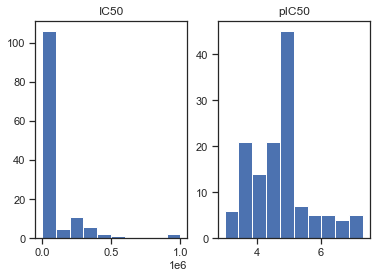

In [132]:
plt.subplot(1,2,1)
plt.title('IC50')
plt.hist(ic50) # less uniform

plt.subplot(1,2,2)
plt.title('pIC50')
plt.hist(pic50) # more uniform

In [133]:
df_final = df_combined.drop('standard_value', axis=1)
df_final['pIC50'] = pic50

In [134]:
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,molecular_weight,logP,numHDonors,numHAcceptors,pIC50
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,281.271,1.89262,0,5,5.142668
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,415.589,3.81320,0,2,5.026872
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0,4,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0,3,4.882397
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,338.344,3.53900,0,5,5.698970
...,...,...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,338.359,3.40102,0,5,4.974694
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,296.366,3.44330,0,3,4.995679
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,276.291,4.09564,0,3,4.939302
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,278.307,3.29102,0,3,4.970616


remove intermediate class


In [135]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']

In [136]:
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,molecular_weight,logP,numHDonors,numHAcceptors,pIC50
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0,4,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0,3,4.882397
5,CHEMBL365134,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c(Br)cccc21,active,372.243,4.39330,0,3,6.008774
7,CHEMBL190743,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(I)cc21,active,419.243,4.23540,0,3,6.022276
8,CHEMBL365469,O=C1C(=O)N(Cc2cc3ccccc3s2)c2cccc(Cl)c21,inactive,327.792,4.28420,0,3,4.950782
...,...,...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,338.359,3.40102,0,5,4.974694
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,296.366,3.44330,0,3,4.995679
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,276.291,4.09564,0,3,4.939302
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,278.307,3.29102,0,3,4.970616


### exploratory data analysis (chemical space analysis) vis Lipinski descriptors

more library

In [137]:
import seaborn as sns
sns.set(style='ticks')

frequency of bioactivity class

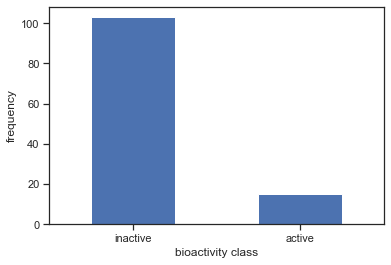

In [138]:
df_2class['bioactivity_class'].value_counts().plot(kind='bar', rot=0)
plt.xlabel('bioactivity class')
plt.ylabel('frequency')

plt.savefig('plot_bioactivity_class.pdf')

scatter plot of molecular_weight VS logP

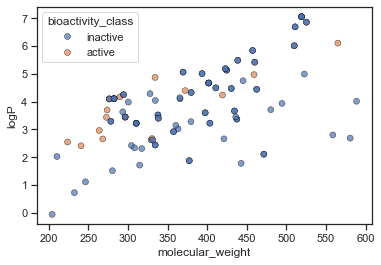

In [139]:
sns.scatterplot(x='molecular_weight', y='logP',data=df_2class,
                hue='bioactivity_class', edgecolor='black', alpha=0.7)

plt.savefig('plot-MW-vs-LogP.pdf')

***Mann-Whitney U-test***  
null hypothesis testing to check that distribution of sample X is  the same as of sample Y

In [143]:
# custom function to boxplot and do mann-whitney u-test
from scipy.stats import mannwhitneyu

def mannwhitney(descriptor):
    sns.boxplot(x='bioactivity_class', y=descriptor, data=df_2class)
    plt.savefig('plot-pic50.pdf')

    selection = [descriptor, 'bioactivity_class']
    df = df_2class[selection]

    active = df[df.bioactivity_class == 'active']
    active = active[descriptor]

    inactive = df[df.bioactivity_class == 'inactive']
    inactive = inactive[descriptor]
    
    stat, p = mannwhitneyu(active, inactive)

    alpha = 0.05
    if p > alpha:
        interpretation = 'same distribution (accept H0)'
    else:
        interpretation = 'different distribution (reject H0)'
    res = pd.DataFrame({
        'Descriptor': descriptor,
        'Statistics': stat,
        'p': p,
        'alpha': alpha,
        'interpretation': interpretation
    }, index=[0])

    filename = 'mannwhitneyu_' + descriptor + '.csv'
    res.to_csv(filename)

    return res

,Descriptor,Statistics,p,alpha,interpretation
0,pIC50,1545.0,4.428384e-10,0.05,different distribution (reject H0)


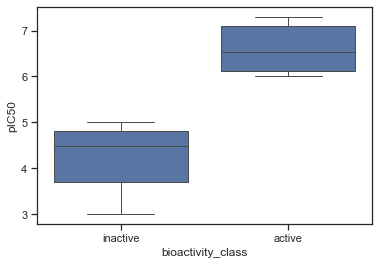

In [144]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,interpretation
0,molecular_weight,408.5,0.003313,0.05,different distribution (reject H0)


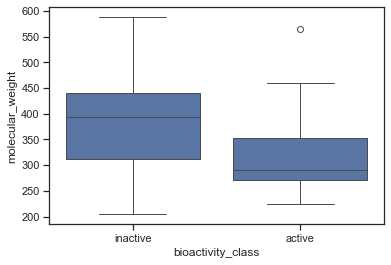

In [145]:
mannwhitney('molecular_weight')

,Descriptor,Statistics,p,alpha,interpretation
0,logP,712.5,0.630683,0.05,same distribution (accept H0)


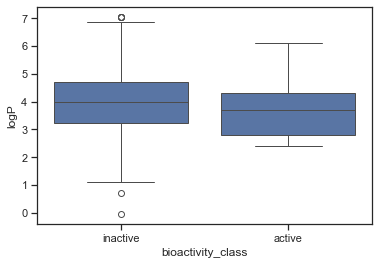

In [146]:
mannwhitney('logP')

,Descriptor,Statistics,p,alpha,interpretation
0,numHDonors,298.5,0.000053,0.05,different distribution (reject H0)


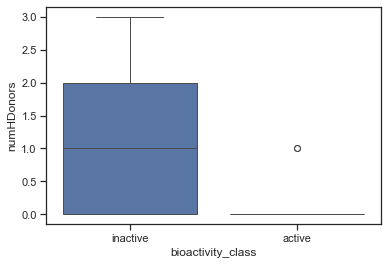

In [147]:
mannwhitney('numHDonors')

,Descriptor,Statistics,p,alpha,interpretation
0,numHAcceptors,414.0,0.003402,0.05,different distribution (reject H0)


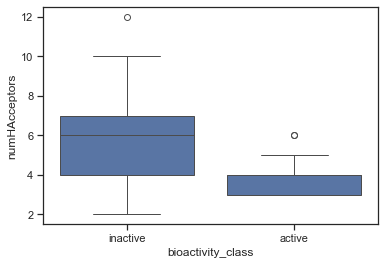

In [148]:
mannwhitney('numHAcceptors')

- ***pIC50*** shows significant difference between <u>the active</u> and <u>the inactive</u>

- from Lipinski's descriptors, only ***logP*** shows no difference between <u>the active</u> and <u>the inactive</u>

### zip files

In [149]:
! zip -r results.zip . -i *.csv *.pdf

  adding: bioactivity_data.csv (188 bytes security) (deflated 90%)
  adding: bioactivity_preprocessed_data.csv (188 bytes security) (deflated 80%)
  adding: mannwhitneyu_logP.csv (188 bytes security) (deflated 7%)
  adding: mannwhitneyu_molecular_weight.csv (188 bytes security) (deflated 11%)
  adding: mannwhitneyu_numHAcceptors.csv (188 bytes security) (deflated 12%)
  adding: mannwhitneyu_numHDonors.csv (188 bytes security) (deflated 9%)
  adding: mannwhitneyu_pIC50.csv (188 bytes security) (deflated 10%)
  adding: plot-MW-vs-LogP.pdf (188 bytes security) (deflated 29%)
  adding: plot-pic50.pdf (188 bytes security) (deflated 34%)
  adding: plot_bioactivity_class.pdf (188 bytes security) (deflated 35%)
